# 1. Perform exploratory analysis on the data and prepare it for modeling. Examine summary statistics, handle missing values/outliers, make binary and dummy variables where applicable. Also make sure to normalize the numeric variables before feeding into the models. (5 points)

1. Describe how you have chosen to handle outliers and missing values. Think before dropping the columns completely or imputing the nulls - which makes more sense? Refer to data for product management content for EDA, handling missing data, feature selection, etc.

In [162]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [163]:
from pandas_profiling import ProfileReport

In [164]:
raw = pd.read_csv('telecom_customer_churn.csv')

In [165]:
raw

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,None,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,None,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,None,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,36,No,0,SJ,92028,33.362575,-117.299644,0,4,None,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6584,9987-LUTYD,Female,20,No,0,SJ,91941,32.759327,-116.997260,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6585,9992-RRAMN,Male,40,Yes,0,SJ,95367,37.734971,-120.954271,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6586,9993-LHIEB,Male,21,Yes,0,SJ,92075,33.001813,-117.263628,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [166]:
raw.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,None,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,None,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,None,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [167]:
# dropping dupkicates
raw.drop_duplicates()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,None,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,None,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,None,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,36,No,0,SJ,92028,33.362575,-117.299644,0,4,None,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6584,9987-LUTYD,Female,20,No,0,SJ,91941,32.759327,-116.997260,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6585,9992-RRAMN,Male,40,Yes,0,SJ,95367,37.734971,-120.954271,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6586,9993-LHIEB,Male,21,Yes,0,SJ,92075,33.001813,-117.263628,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [168]:
# dropping latitude, longitude, and zip code because they won't give clear data about the place of the customer, 
# city will give a much clearer indication of the location
total=['gender', 'age','married', 'number_of_family_dependents', 'city', 'number_of_referrals',
       'tenure_in_months','offer','internet_service', 'internet_type','avg_monthly_gb_download','online_security',
      'online_backup','device_protection_plan','premium_tech_support','streaming_tv','streaming_movies','streaming_music',
      'unlimited_hi-res_streaming','subscription_type','paperless_billing','payment_method','monthly_charge',
      'total_charges','total_refunds','total_extra_data_charges','total_long_distance_charges','total_revenue','viewer_status']

# Exploratory Data Analysis

In [169]:
#Checking for summary statistics, missing values, correlations and distributions through ProfileReport
#checking summary statistics
raw[total].describe()

,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [170]:
#SD of total_charges= 2264.668413, total_long_distance_charges=853.832041, 
#total_revenue are exceptionally high= 2854.047975

In [12]:
# data profiling
ProfileReport(raw[total])

In [171]:
print(raw[total].isnull().sum()) # to verify number of null values

gender                            0
age                               0
married                           0
number_of_family_dependents       0
city                              0
number_of_referrals               0
tenure_in_months                  0
offer                             0
internet_service                  0
internet_type                  1344
avg_monthly_gb_download        1344
online_security                1344
online_backup                  1344
device_protection_plan         1344
premium_tech_support           1344
streaming_tv                   1344
streaming_movies               1344
streaming_music                1344
unlimited_hi-res_streaming     1344
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges                     0
total_refunds                     0
total_extra_data_charges          0
total_long_distance_charges       0
total_revenue               

2. Include visualizations such as histograms and boxplots where appropriate in describing the results of EDA

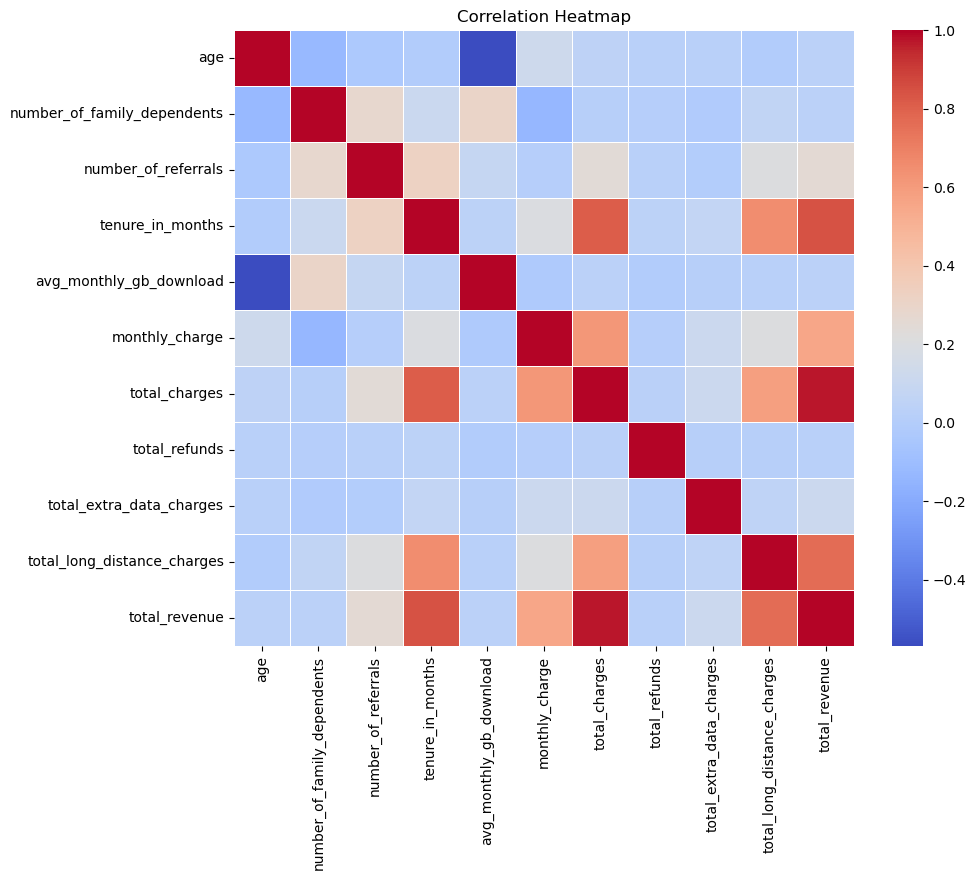

In [172]:
### Select only numeric columns from the DataFrame
numeric_df = raw[total].select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [173]:
# The heatmap shows correlations between the variables

# Almost all the correlations are the expected ones e.g., 
# 1. total charges,total long distance charges, and total revenue are positively correlated with tenure in months; 
# As tenure in months increases, other charges like the ones mentioned above are bound to increase
# 2. total charges is highly positively correlated to total revenue
# 3. total long distance charges is positively correlated to total revenue 
# 4. Age is negatively correlated to the average monthly GB download which could be explained that old-people are not
# very aware of using the technology and new features

# one unexpected negative correlation is between number of family dependents and monthly charge which is 
# counter intuitive. 

# Checking for outliers

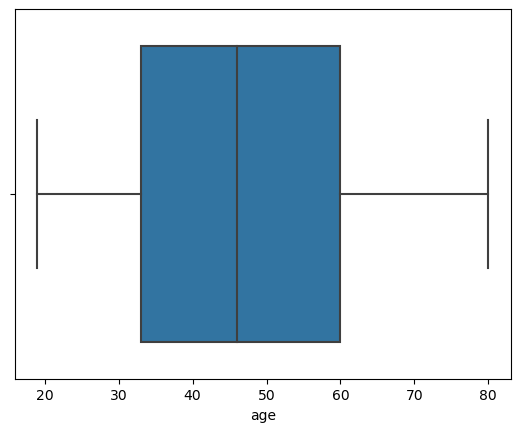

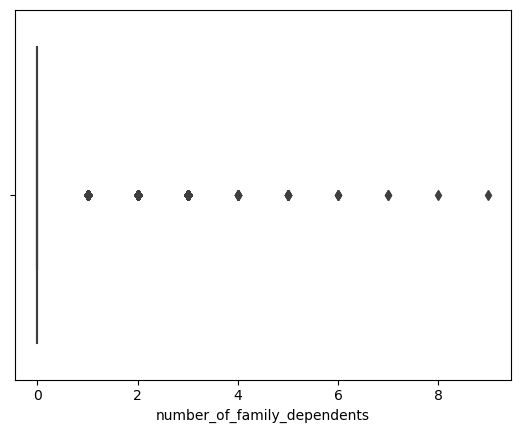

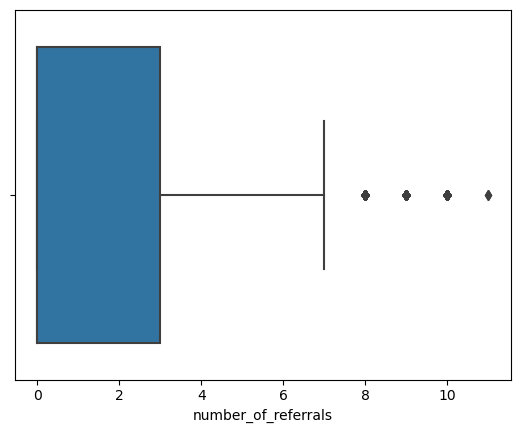

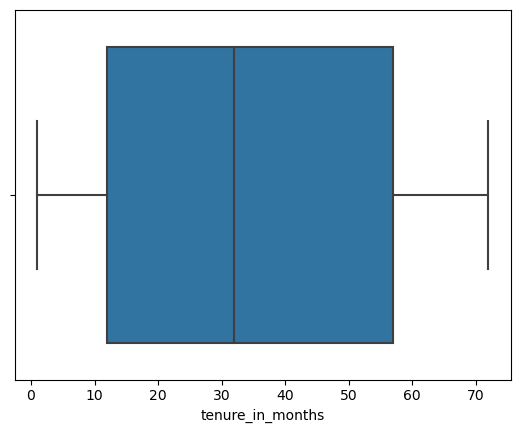

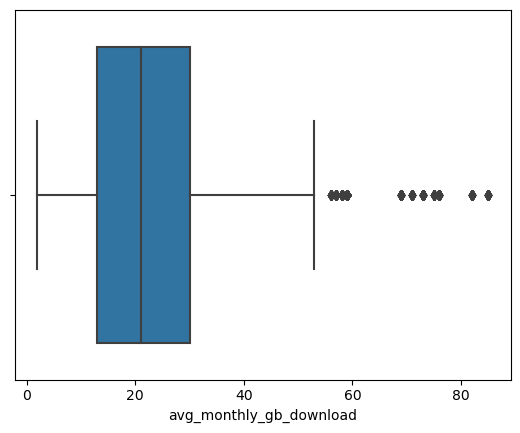

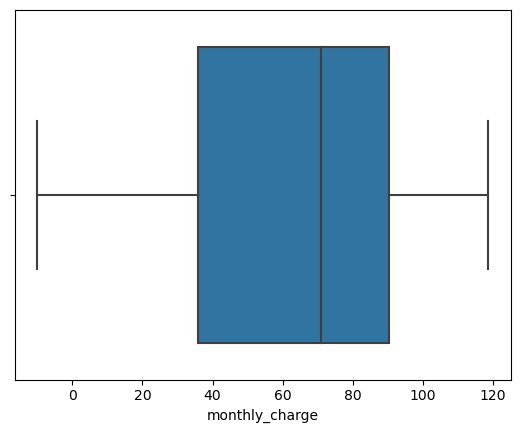

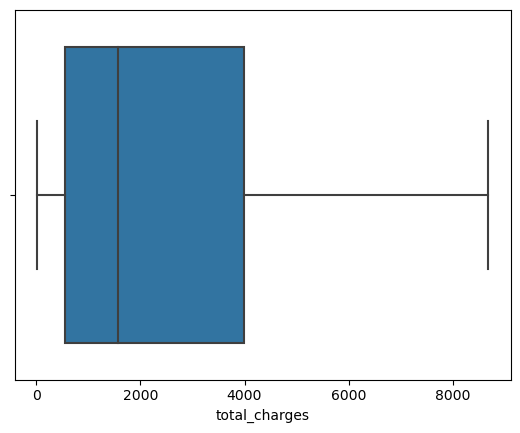

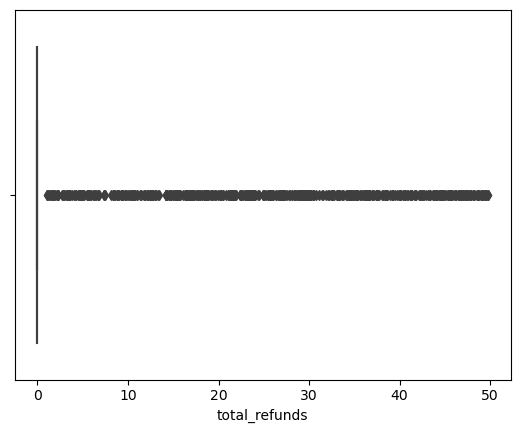

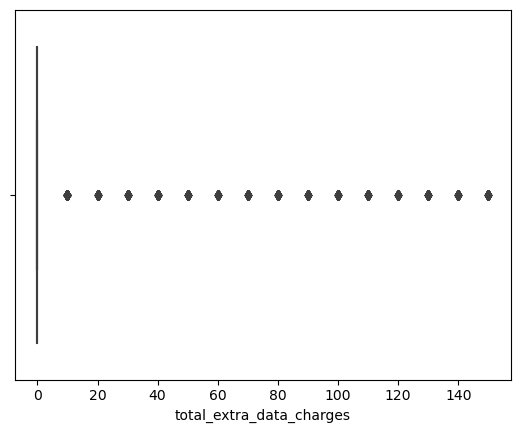

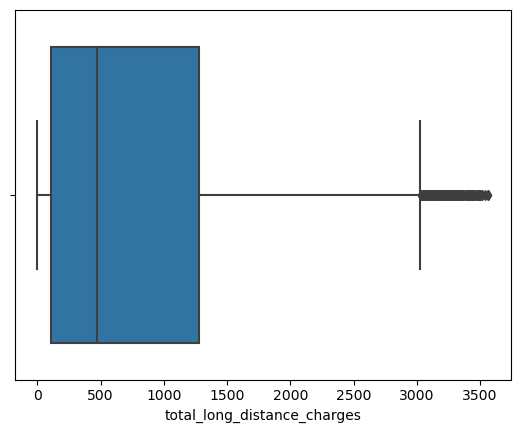

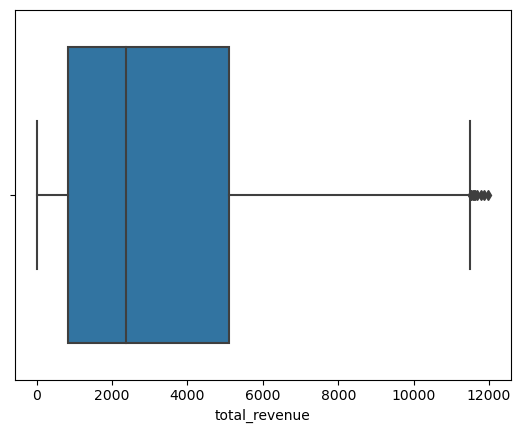

In [174]:
# boxplots for describing the results of EDA
for var in total:
    if var in ('gender', 'married', 'city','offer','internet_service', 'internet_type','online_security',
      'online_backup','device_protection_plan','premium_tech_support','streaming_tv','streaming_movies','streaming_music',
      'unlimited_hi-res_streaming','subscription_type','paperless_billing','payment_method','viewer_status'):
        continue
    else:
        plt.figure(var)
        sns.boxplot(x = raw[var])

In [175]:
# Closing all the figures to save memory
for var in total:
    if var in ('gender', 'married', 'city','offer','internet_service', 'internet_type','online_security',
      'online_backup','device_protection_plan','premium_tech_support','streaming_tv','streaming_movies','streaming_music',
      'unlimited_hi-res_streaming','subscription_type','paperless_billing','payment_method'):
        continue
    else:
        plt.close(var)

In [176]:
# The outliers in our data are in the reasonable range so there is no point in dropping them.
# Example: For most cases there are no family dependents that's why 0 has highest frequency.
# But there could be 10 family dependents so the outliers in this case are in the reasonable range
# Similarly for total_extra_data_charges and total_refunds most of the entries are zero but the outliers are not 
# unreasonably high so can be kept in the dataset and there is no need to exclude them. 

In [177]:
df = raw[total]

In [178]:
df

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,Female,37,Yes,0,SD,2,9,None,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,SD,0,9,None,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,SD,3,3,None,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,Female,36,No,0,SJ,0,4,None,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6584,Female,20,No,0,SJ,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6585,Male,40,Yes,0,SJ,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6586,Male,21,Yes,0,SJ,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


# Imputing missing values and removing duplicate rows

In [179]:
df.isnull().sum()[df.isnull().sum() > 0] # missing values > 0

internet_type                 1344
avg_monthly_gb_download       1344
online_security               1344
online_backup                 1344
device_protection_plan        1344
premium_tech_support          1344
streaming_tv                  1344
streaming_movies              1344
streaming_music               1344
unlimited_hi-res_streaming    1344
dtype: int64

In [180]:
# list of variables having missing values. 
missing_list = df.isnull().sum()[df.isnull().sum() > 0].reset_index()['index']
missing_list

0                 internet_type
1       avg_monthly_gb_download
2               online_security
3                 online_backup
4        device_protection_plan
5          premium_tech_support
6                  streaming_tv
7              streaming_movies
8               streaming_music
9    unlimited_hi-res_streaming
Name: index, dtype: object

In [181]:
for var in missing_list:
    if isinstance(var, (int, float)):
        print(f"{var}: The variable is numeric.")
    else:
        print(f"{var}: The variable is not numeric.")

internet_type: The variable is not numeric.
avg_monthly_gb_download: The variable is not numeric.
online_security: The variable is not numeric.
online_backup: The variable is not numeric.
device_protection_plan: The variable is not numeric.
premium_tech_support: The variable is not numeric.
streaming_tv: The variable is not numeric.
streaming_movies: The variable is not numeric.
streaming_music: The variable is not numeric.
unlimited_hi-res_streaming: The variable is not numeric.


In [182]:
df['internet_service'].value_counts()

Yes    5244
No     1344
Name: internet_service, dtype: int64

In [183]:
# As can been seen from the data, there are 1344 customers who do not have internet service.
# If a customer does not have internet service then all the below mentioned variables are bound to be zero.
# 1. internet_type
# 2. avg_monthly_gb_download
# 3. online_security
# 4. online_backup
# 5. device_protection_plan
# 6. premium_tech_support
# 7. streaming_tv
# 8. streaming_movies
# 9. streaming_music
# 10.unlimited_hi-res_streaming

# For our analysis, the relevant customers are the ones who have internet service. 
# So we can drop all the 1344 customers as they will be of no use in our analysis of churning or staying
# Dropping the columns completely makes more sense

In [184]:
# dropping all the empty values
df=df.dropna()

In [185]:
df.isnull().sum()[df.isnull().sum() > 0] # missing values > 0
# to check if all the missing values are gone or not

Series([], dtype: int64)

In [186]:
# to check if all the missing values are gone or not
df.isnull().sum()

gender                         0
age                            0
married                        0
number_of_family_dependents    0
city                           0
number_of_referrals            0
tenure_in_months               0
offer                          0
internet_service               0
internet_type                  0
avg_monthly_gb_download        0
online_security                0
online_backup                  0
device_protection_plan         0
premium_tech_support           0
streaming_tv                   0
streaming_movies               0
streaming_music                0
unlimited_hi-res_streaming     0
subscription_type              0
paperless_billing              0
payment_method                 0
monthly_charge                 0
total_charges                  0
total_refunds                  0
total_extra_data_charges       0
total_long_distance_charges    0
total_revenue                  0
viewer_status                  0
dtype: int64

3. Describe how the findings from EDA influence your choice of data preparation and choice of modeling techniques

In [187]:
# As can be seen from the EDA, there are many categorical variables.
# So I have selected random forest for modeling
# converting all the boolean values to 0s and 1s 
# converting female and male to 1s and 0s
# converting other categorical values to dummy variables

In [188]:
df

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,Female,37,Yes,0,SD,2,9,None,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,SD,0,9,None,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,SD,3,3,None,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,Female,53,No,0,SJ,0,1,Offer E,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned
6584,Female,20,No,0,SJ,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6585,Male,40,Yes,0,SJ,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6586,Male,21,Yes,0,SJ,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [189]:
# Using .replace() to replace all the boolean varibles to integer: 0 for No and 1 for Yes
df=df.replace({'Yes': 1, 'No': 0})

In [190]:
# Using .replace() to replace all the gender varibles to integer: 1 for female and 0 for male
df['gender']=df['gender'].replace({'Female': 1, 'Male': 0})

In [191]:
# Using .replace() to replace all the gender varibles to integer: 1 for churned and 0 for stayed
df['viewer_status']=df['viewer_status'].replace({'Churned': 1, 'Stayed': 0})

In [192]:
df

,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,1,37,1,0,SD,2,9,None,1,Cable,16.0,0,1,0,1,1,0,0,1,One Year,1,Credit Card,65.60,593.30,0.00,0,381.51,974.81,0
1,0,46,0,0,SD,0,9,None,1,Cable,10.0,0,0,0,0,0,1,1,0,Month-to-Month,0,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,0
2,0,50,0,0,SD,0,4,Offer E,1,Fiber Optic,30.0,0,0,1,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,1
3,0,78,1,0,SD,1,13,Offer D,1,Fiber Optic,4.0,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,1
4,1,75,1,0,SD,3,3,None,1,Fiber Optic,11.0,0,0,0,1,1,0,0,1,Month-to-Month,1,Credit Card,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,1,53,0,0,SJ,0,1,Offer E,1,Fiber Optic,9.0,0,0,0,0,0,0,0,1,Month-to-Month,1,Credit Card,70.15,70.15,0.00,0,42.09,112.24,1
6584,1,20,0,0,SJ,0,13,Offer D,1,DSL,59.0,1,0,0,1,0,0,1,1,One Year,0,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,0
6585,0,40,1,0,SJ,1,22,Offer D,1,Fiber Optic,17.0,0,0,0,0,0,1,1,1,Month-to-Month,1,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,1
6586,0,21,1,0,SJ,5,67,Offer A,1,Cable,58.0,1,0,1,1,0,1,1,1,Two Year,0,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,0


# Normalizing/Scaling the data 

In [193]:
# Now we do not have any empty values

In [194]:
#dummy variables for the categorical ones
dummy = pd.get_dummies(df)

In [195]:
dummy

,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,1,37,1,0,2,9,1,16.0,0,1,0,1,1,0,0,1,1,65.60,593.30,0.00,0,381.51,974.81,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,46,0,0,0,9,1,10.0,0,0,0,0,0,1,1,0,0,-4.00,542.40,38.33,10,96.21,610.28,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0,50,0,0,0,4,1,30.0,0,0,1,0,0,0,0,1,1,73.90,280.85,0.00,0,134.60,415.45,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,0,78,1,0,1,13,1,4.0,0,1,1,0,1,1,0,1,1,98.00,1237.85,0.00,0,361.66,1599.51,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,75,1,0,3,3,1,11.0,0,0,0,1,1,0,0,1,1,83.90,267.40,0.00,0,22.14,289.54,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,1,53,0,0,0,1,1,9.0,0,0,0,0,0,0,0,1,1,70.15,70.15,0.00,0,42.09,112.24,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
6584,1,20,0,0,0,13,1,59.0,1,0,0,1,0,0,1,1,0,55.15,742.90,0.00,0,606.84,1349.74,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
6585,0,40,1,0,1,22,1,17.0,0,0,0,0,0,1,1,1,1,85.10,1873.70,0.00,0,356.40,2230.10,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
6586,0,21,1,0,5,67,1,58.0,1,0,1,1,0,1,1,1,0,67.85,4627.65,0.00,0,142.04,4769.69,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


4. Consider ways to reduce dimensions of data suitable for clustering, remember to scale your data before doing that - provide reasons for using scaling technique. Mention your reasons for using a particular clustering algo, and rationale behind choosing number of clusters.

Answer: I am keeping binary variables as it is and scaling the numeric values using StandardScaler(). Standard scalar standardizes features of the data set by scaling to unit variance and removing the mean (optionally) using column summary statistics on the samples in the training set. 

Using K-mean clustering. K-means clustering minimizes within cluster variances, and, it tends to find clusters of comparable spatial extent. As there are many categorical variables , this will help form clusters which have similar set of attributes or characteristics.

In [196]:
df_scaled = dummy.copy()
# skipping the non-numeric identifying columns
cols_to_scale =['age','number_of_family_dependents','number_of_referrals','tenure_in_months','avg_monthly_gb_download',
                'monthly_charge','total_charges','total_refunds','total_extra_data_charges','total_long_distance_charges','total_revenue'] 
scaler = StandardScaler()
scaler.fit(df_scaled[cols_to_scale])
df_scaled[cols_to_scale] = scaler.transform(df_scaled[cols_to_scale])

In [197]:
df_scaled

,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,1,-0.617950,1,-0.437896,0.019433,-1.055922,1,-0.522784,0,1,0,1,1,0,0,1,1,-0.448445,-0.971344,-0.259137,-0.314610,-0.461818,-0.891920,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,-0.098227,0,-0.437896,-0.655430,-1.055922,1,-0.829454,0,0,0,0,0,1,1,0,0,-3.343624,-0.993133,4.396754,0.034631,-0.792635,-1.013498,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,0,0.132761,0,-0.437896,-0.655430,-1.263052,1,0.192780,0,0,1,0,0,0,0,1,1,-0.103187,-1.105096,-0.259137,-0.314610,-0.748120,-1.078479,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,0,1.749676,1,-0.437896,-0.317999,-0.890218,1,-1.136124,0,1,1,0,1,1,0,1,1,0.899310,-0.695428,-0.259137,-0.314610,-0.484835,-0.683568,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1.576435,1,-0.437896,0.356864,-1.304478,1,-0.778342,0,0,0,1,1,0,0,1,1,0.312787,-1.110854,-0.259137,-0.314610,-0.878522,-1.120472,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,1,0.306002,0,-0.437896,-0.655430,-1.387330,1,-0.880566,0,0,0,0,0,0,0,1,1,-0.259177,-1.195292,-0.259137,-0.314610,-0.855390,-1.179606,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
6584,1,-1.599648,0,-0.437896,-0.655430,-0.890218,1,1.675019,1,0,0,1,0,0,1,1,0,-0.883138,-0.907304,-0.259137,-0.314610,-0.200538,-0.766872,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
6585,0,-0.444709,1,-0.437896,-0.317999,-0.517383,1,-0.471672,0,0,0,0,0,1,1,1,1,0.362704,-0.423235,-0.259137,-0.314610,-0.490934,-0.473252,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
6586,0,-1.541901,1,-0.437896,1.031726,1.346789,1,1.623907,1,0,1,1,0,1,1,1,0,-0.354851,0.755665,-0.259137,-0.314610,-0.739493,0.373758,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


## 2: Segmentation

In [198]:
# At this stage, we have a lot of features, so clustering on them directly may lead to increased complexity and
# possible overfitting. Hence, we can use a dimensionality reduction technique like randome tree to reduce the number
# of features

In [199]:
len(df_scaled.columns)

43

In [200]:
# Random Forest: Random Forest can handle categorical features naturally. 
# Trees in a Random Forest can make decisions based on categorical splits, 
# making it suitable for datasets with mixed types of features, including both numerical and categorical.
# Random Forest: Random Forest can capture complex, non-linear relationships between features, 
# which is beneficial when dealing with categorical variables that may have non-linear effects on the target variable.

# Hence selecting Random Forest for feature selection. 

In [201]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [202]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)

train, test = train_test_split(df_scaled, test_size = 0.34)
  
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('viewer_status', axis=1), train['viewer_status'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['viewer_status'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.8292401040161803 
 OOB Confusion Matrix 
       0    1
0  2109  193
1   398  761


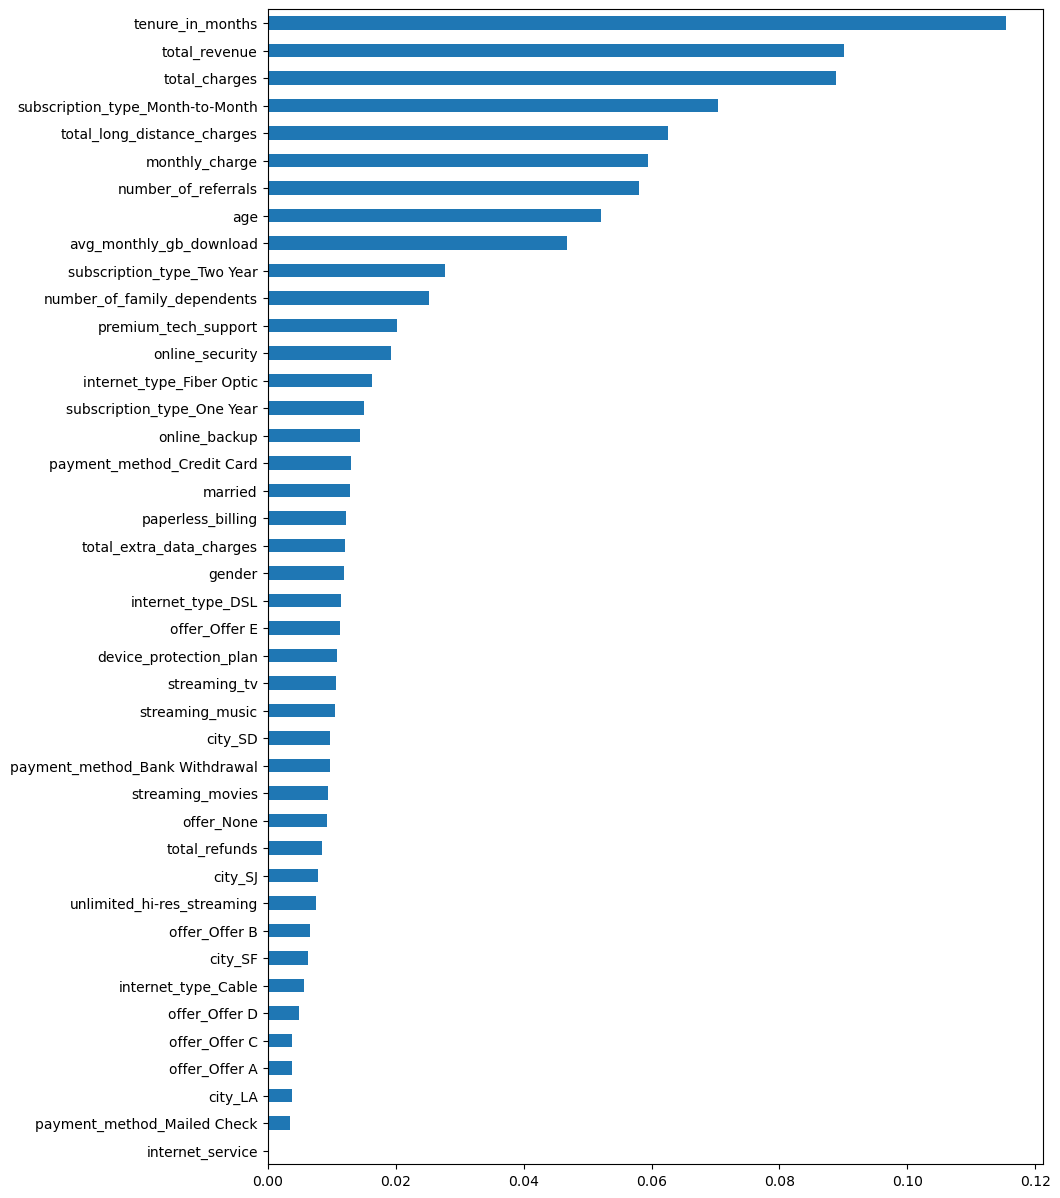

In [203]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('viewer_status', axis=1).columns)
plt.figure(figsize=(10, 15))  # Adjust the width (10) and height (6) as needed
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [204]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop('viewer_status', axis=1),test['viewer_status']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['viewer_status'], rf.predict(test.drop('viewer_status', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8356702187324734 
 Test Set Confusion Matrix 
       0    1
0  1095   91
1   202  395


# 2. Explore if there are segments of customers with similar account profiles and churn rates. Use clustering and explain your choice of number of clusters. (5 points)

# Clustering

In [205]:
# Checking for up to 20 clusters
wcss = [] #Within-cluster sum of squares
#Selecting all the impotant feature
feature=df_scaled[['tenure_in_months','total_revenue','total_charges','subscription_type_Month-to-Month',
                   'total_long_distance_charges','monthly_charge','number_of_referrals','age','avg_monthly_gb_download',
                   'subscription_type_Two Year','number_of_family_dependents','premium_tech_support','online_security']]

for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(feature)
    wcss.append(kmeans_pca.inertia_)

/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

Text(0, 0.5, 'WCSS')

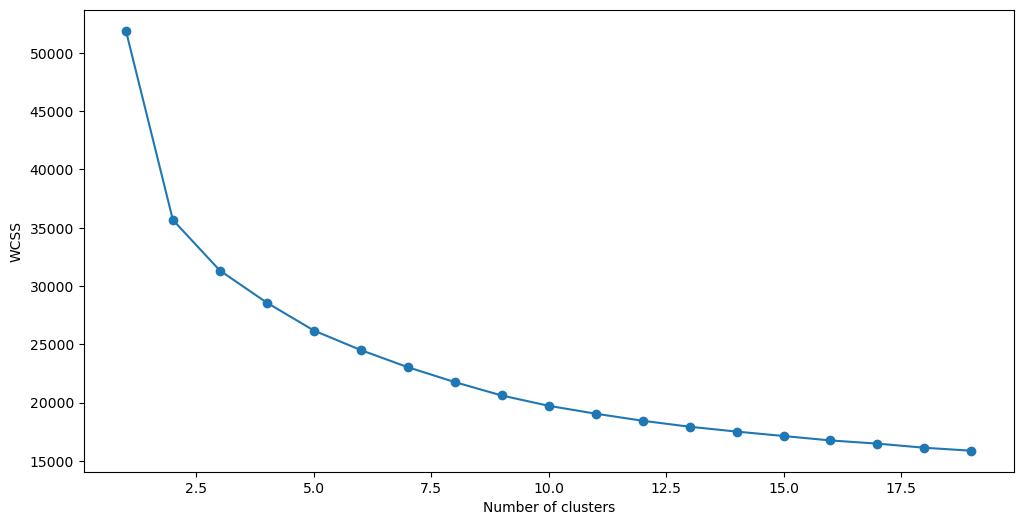

In [206]:
# Deciding on the number of clusters using elbow method

plt.figure(figsize=(12,6))
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [207]:
# from K-mean, k turns out to be 2. So we will take 2 clusters.

In [208]:
# adding the labels
df['clusters'] = kmeans_pca.labels_

In [209]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_pca.fit(feature)


/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [210]:
# adding the labels
df['clusters'] = kmeans_pca.labels_

/Users/gupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


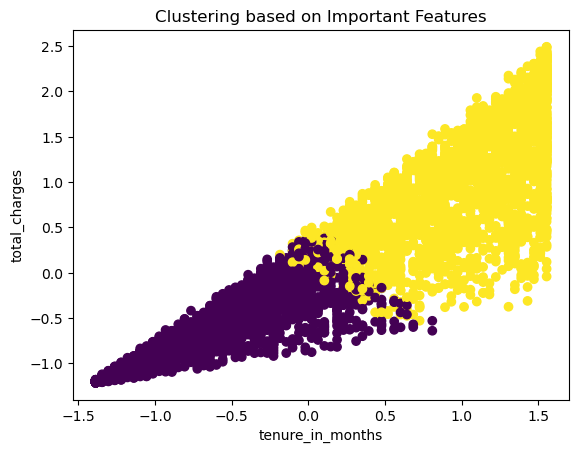

In [211]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Train a Random Forest Model
# Load your dataset and split it into features (X) and target (y)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(df_scaled, df_scaled['viewer_status'])

# Step 2: Select Important Features
# Extract feature importances
feature_importances = rf.feature_importances_

# Decide on a threshold for selecting important features (e.g., 0.05)
threshold = 0.05
important_features = df_scaled.columns[feature_importances > threshold]

# Step 3: Subset the Data
# Create a subset of your data containing only the important features
data_subset = df_scaled[important_features]

# Step 4: Perform Clustering
# Apply a clustering algorithm to the subset of data
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data_subset)

# Step 5: Visualize Clusters
# Visualize the clusters
plt.scatter(data_subset.iloc[:, 0], data_subset.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel(important_features[0])  # Adjust labels based on your important features
plt.ylabel(important_features[1])  # Adjust labels based on your important features
plt.title('Clustering based on Important Features')
plt.show()


Step 3: Select Segmentation Variables
The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Good exploratory research that gives us a good sense of what variables may distinguish people or products or assets or regions is critical. Clearly this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters

In [212]:
# 2. Explore if there are segments of customers with similar account profiles and churn rates.

In [213]:
cluster_stats = df_scaled.groupby(clusters).agg(['mean'])
print(cluster_stats)

     gender       age   married number_of_family_dependents  \
       mean      mean      mean                        mean   
0  0.500669  0.014812  0.362784                   -0.086987   
1  0.494238 -0.019619  0.677305                    0.115212   

  number_of_referrals tenure_in_months internet_service  \
                 mean             mean             mean   
0           -0.248886        -0.763971              1.0   
1            0.329642         1.011855              1.0   

  avg_monthly_gb_download online_security online_backup  \
                     mean            mean          mean   
0               -0.027011        0.243641      0.291834   
1                0.035775        0.551418      0.665780   

  device_protection_plan premium_tech_support streaming_tv streaming_movies  \
                    mean                 mean         mean             mean   
0               0.295181             0.244980     0.374833         0.375167   
1               0.667996            

In [214]:
churn_cluster_table = pd.crosstab(df_scaled['viewer_status'], clusters)
print(churn_cluster_table)

col_0             0     1
viewer_status            
0              1532  1956
1              1456   300


In [215]:
# # Cluster zero has a high churning rate of 48.73% whereas cluster one has a churning rate of 13.3%
# Cluster 0:

# Account Profiles:
# Gender: Approximately balanced between genders.
# Age: Slightly older on average.
# Marital Status (Married): Lower percentage of married customers.
# Number of Family Dependents: Slightly fewer family dependents.
# Number of Referrals: Fewer referrals.
# Tenure in Months: Lower average tenure.
# Internet Service: Dominated by a single type (possibly Fiber Optic).
# Various Online Services (e.g., Online Security, Online Backup, Device Protection Plan): Lower usage rates.
# Paperless Billing: Higher usage of paperless billing.
# Monthly Charge: Lower average monthly charge.
# City: Distributions across cities are not drastically different.
# Offer Types: Dominated by "None" offer type.
# Internet Type: A mix, but DSL and Fiber Optic are notable.
# Subscription Type: Dominated by month-to-month subscriptions.
# Payment Methods: Dominated by bank withdrawal and credit card.
# Churn Rate: The mean "viewer_status" is approximately 0.487, indicating a relatively balanced mix of people who stayed and people who churned. 
# The churn rate is not significantly skewed in either direction.

#Recommendations:
# So in order to reduce the churn rate, the focus could be to improve Online Security, Online Backup, and Device Protection Plan.
# Promote different offer types in this cluster.
# It can be seen that this group has subscription type month-to-month which makes it easier for customers to switch,
# as compared to one-year or two-year subscription.
# lower average monthly charge combined with subscription type month-to-month makes it easier for customers to leave.
# The cluster consist of people who are older and not married and have fewer family dependents 
# which makes it easier for them to switch and hence high churn value.

# Cluster 1:

# Account Profiles:
# Gender: Slightly more balanced between genders.
# Age: Slightly younger on average.
# Marital Status (Married): Higher percentage of married customers.
# Number of Family Dependents: Slightly more family dependents.
# Number of Referrals: More referrals.
# Tenure in Months: Higher average tenure.
# Internet Service: Dominated by a single type (possibly Fiber Optic).
# Various Online Services (e.g., Online Security, Online Backup, Device Protection Plan): Higher usage rates.
# Paperless Billing: Lower usage of paperless billing.
# Monthly Charge: Higher average monthly charge.
# City: Distributions across cities are not drastically different.
# Offer Types: Dominated by "Offer A" and "Offer B."
# Internet Type: A mix, but DSL and Fiber Optic are notable.
# Subscription Type: Dominated by one-year and two-year subscriptions.
# Payment Methods: Dominated by credit card.
# Churn Rate: The mean "viewer_status" is approximately 0.133, indicating a lower proportion of people who churned.

# 3. Build two models to predict churn using different supervised learning approaches. What are the top 5 most predictive factors? How do the models compare in terms of accuracy? (6 points)# 

## 3: Prediction through supervised learning

In [216]:
# Before we run a model, we need to reduce the number of features and exclude the highly correlated ones

In [217]:
#df_scaled = df_scaled(column_to_drop, axis=1)
df_scaled=df_scaled.reset_index()

In [218]:
# Defining threshold to remove collinear
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [219]:
cols =['gender','age','married','number_of_family_dependents','number_of_referrals','tenure_in_months','internet_service',
                'avg_monthly_gb_download','online_security','online_backup','device_protection_plan',
                'premium_tech_support','streaming_tv','streaming_movies','streaming_music','unlimited_hi-res_streaming',
                'paperless_billing','monthly_charge','total_charges','total_refunds','city_LA','city_SD','city_SF',
                'city_SJ','offer_None','offer_Offer A', 'offer_Offer B','offer_Offer C','offer_Offer D','internet_type_Fiber Optic',
                'subscription_type_Month-to-Month','subscription_type_One Year','subscription_type_Two Year',
                'subscription_type_Two Year','payment_method_Bank Withdrawal','payment_method_Credit Card','payment_method_Mailed Check',
                'total_long_distance_charges','total_extra_data_charges','total_revenue','viewer_status'] 

In [220]:
# computing VIF to confirm the high collinearity which exists between the features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_scaled[cols]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

# Hence the first bunch has a lot of collinear features. We can remove them.

/Users/gupta/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,Column
32,1.279815e+09,subscription_type_Two Year
33,1.279815e+09,subscription_type_Two Year
20,1.114853e+09,city_LA
36,2.532433e+08,payment_method_Mailed Check
23,9.601211e+07,city_SJ
22,5.693639e+07,city_SF
30,2.695727e+06,subscription_type_Month-to-Month
19,2.045547e+06,total_refunds
34,1.358836e+06,payment_method_Bank Withdrawal
37,9.685646e+05,total_long_distance_charges


In [221]:
# excluding the id matrices as well as the outcome ones from the value of x, and hence starting 7. Moreover, we
# are using the scaled dataframe

use_features = remove_collinear_features(df_scaled[cols], 0.4)
use_features

Removed Columns {'monthly_charge', 'internet_type_Fiber Optic', 'number_of_referrals', 'avg_monthly_gb_download', 'device_protection_plan', 'online_backup', 'viewer_status', 'subscription_type_One Year', 'streaming_music', 'subscription_type_Two Year', 'streaming_movies', 'total_extra_data_charges', 'payment_method_Credit Card', 'city_SJ', 'offer_Offer B', 'city_SF', 'total_long_distance_charges', 'subscription_type_Month-to-Month', 'offer_Offer A', 'total_charges', 'total_revenue'}


,gender,age,married,number_of_family_dependents,tenure_in_months,internet_service,online_security,premium_tech_support,streaming_tv,unlimited_hi-res_streaming,paperless_billing,total_refunds,city_LA,city_SD,offer_None,offer_Offer C,offer_Offer D,payment_method_Bank Withdrawal,payment_method_Mailed Check
0,1,-0.617950,1,-0.437896,-1.055922,1,0,1,1,1,1,-0.259137,0,1,1,0,0,0,0
1,0,-0.098227,0,-0.437896,-1.055922,1,0,0,0,0,0,4.396754,0,1,1,0,0,0,0
2,0,0.132761,0,-0.437896,-1.263052,1,0,0,0,1,1,-0.259137,0,1,0,0,0,1,0
3,0,1.749676,1,-0.437896,-0.890218,1,0,0,1,1,1,-0.259137,0,1,0,0,1,1,0
4,1,1.576435,1,-0.437896,-1.304478,1,0,1,1,1,1,-0.259137,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,1,0.306002,0,-0.437896,-1.387330,1,0,0,0,1,1,-0.259137,0,0,0,0,0,0,0
5240,1,-1.599648,0,-0.437896,-0.890218,1,1,1,0,1,0,-0.259137,0,0,0,0,1,0,0
5241,0,-0.444709,1,-0.437896,-0.517383,1,0,0,0,1,1,-0.259137,0,0,0,0,1,1,0
5242,0,-1.541901,1,-0.437896,1.346789,1,1,1,0,1,0,-0.259137,0,0,0,0,0,0,0


# Model 1: Linear Regression

In [229]:
# create a cross-validation object with 5 folds
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [231]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(use_features, df_scaled['viewer_status'], test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Use cross-validation on the training set to find the mean squared error of the model
mse_scores = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

r2_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()

# Calculate the mean MSE and standard deviation of the scores
mean_mse = mse_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean R2: {mean_r2:.2f}')

# Evaluate the model on the test set
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
test_mse = ((lr_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')

Training set - Mean MSE: 0.15, Mean R2: 0.31
Test set - MSE: 0.16


# Model 2: Random Forest Regression

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(use_features, df_scaled['viewer_status'], test_size=0.2, random_state=42)

# Create a random forest regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)

# Use cross-validation on the training set to find the mean squared error of the model
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
# #

# Calculate the mean MSE of the scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean R2: {mean_r2:.2f}')

# Evaluate the model on the test set
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
test_mse = ((rf_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')

Training set - Mean MSE: 0.15, Mean R2: 0.34
Test set - MSE: 0.15


In [241]:
# Classification
# Both the models based on different supervised learning have a comparable mean squared error. 
# In terms of accuracy both the model are equally accurate as MSE is ~0.15
# We cannot use accuracy_score, precision_score, recall_score for comparing the models as most of our variables are 
# continous and not discrete.

# ### Top 5 features


# Random Forest

In [141]:
# get the feature importances
importances = rf_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': use_features.columns, 'importance': importances})

# sort the features by importance, in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# print the top 5 most important features
print(feature_importances.head(5))

                       feature  importance
0             tenure_in_months    0.449865
1                          age    0.200090
2  number_of_family_dependents    0.040867
3              online_security    0.027746
4                      city_SD    0.027681


In [242]:
# The top 5 features of random forest in the order are as follows:
# 0 tenure_in_months
# 1 age
# 2 number_of_family_dependents
# 3 online_security
# 4 city_SD

# Linear Regression

In [142]:
# Top 5 for linear regression
from sklearn.feature_selection import SelectKBest, f_regression

In [143]:
X = use_features
y = df_scaled['viewer_status']

kbest = SelectKBest(score_func=f_regression, k=5)
X_new = kbest.fit_transform(X, y)

In [144]:
selected_features = [X.columns[i] for i in kbest.get_support(indices=True)]

In [145]:
# print the coefficients of the selected features
print(selected_features)

['married', 'number_of_family_dependents', 'tenure_in_months', 'online_security', 'premium_tech_support']


In [146]:
coefficients = pd.DataFrame({'feature': use_features.columns, 'coefficient': lr_model.coef_})
coefficients = coefficients[coefficients['feature'].isin(selected_features)]# restricting to just the top 5 features

coefficients = coefficients.sort_values('coefficient', ascending=False).reset_index(drop=True)
print(coefficients)

                       feature  coefficient
0                      married     0.024131
1  number_of_family_dependents    -0.068946
2              online_security    -0.098944
3         premium_tech_support    -0.102894
4             tenure_in_months    -0.195290


In [ ]:
# The top 5 features of linear regression in the order are as follows:
# 0 married
# 1 number_of_family_dependents
# 2 online_security
# 3 premium_tech_support
# 4 tenure_in_months

# 4. Based on the models, which customer segment in the data is most at risk for churn? What actions would you recommend to reduce churn for this segment? (4 points)

In [243]:
# There are 3 common features from the model: 
# 1 tenure_in_months
# 2 number_of_family_dependents
# 3 online_security

# So these can be considered as the top 3 features for deciding the churning rate. 
# People who have less tenure in months, less online security, and less number of dependents are more likely to churn

## 4: Model Accuracy and recommendations to reduce churn rate

In [245]:
# Based on the feature importance rankings from both the linear regression and random forest models, we can identify which features are most influential in predicting churn. It appears that the top features differ between the two models, so let's analyze them separately:

# **Linear Regression Model:**
# 1. Married
# 2. Number of Family Dependents
# 3. Online Security
# 4. Premium Tech Support
# 5. Tenure in Months

# **Random Forest Model:**
# 1. Tenure in Months
# 2. Age
# 3. Number of Family Dependents
# 4. Online Security
# 5. City_SD

# To identify the customer segment most at risk for churn, we should consider the importance of these features 
# in each model and how they relate to customer churn:

# 1. Linear Regression Model:
# The linear regression model suggests that customers who are **not married**, have **fewer family dependents**, 
# lack **online security**, do not have **premium tech support**, and have a **shorter tenure in months** are at a higher risk of churn.
   
# 2. Random Forest Model:
# The random forest model indicates that customers with a **short tenure in months**, **younger age**, **fewer family 
# dependents**, **lack of online security**, and who reside in a specific city (City_SD) are at a higher risk of churn.

# Recommendations to Reduce Churn for the Most At-Risk Segment:

# Based on the insights from these two models, it seems that customers with shorter tenure, fewer family dependents, 
# and a lack of online security are consistently identified as at-risk for churn. Here are some actions to be considered
# to reduce churn for this segment:

# 1. Offer Online Security: Since the absence of online security is a risk factor, consider offering robust 
# online security features, such as antivirus software, firewall protection, and data encryption. 
# Highlight these features to customers.

# 2. Customer Education: Provide educational resources and tutorials to help customers make the most of the services. 
# This can include webinars, FAQs, and knowledge base articles.

# 3. Customer Support: Enhance customer support, especially for customers with shorter tenure. 
# Ensure that they can easily reach out for assistance, and address their concerns promptly and effectively.

# 4. Retention Offers: Consider offering retention offers or loyalty programs to reward long-term customers. 
# These can include discounts, loyalty points, or exclusive access to new features.

# 5. Feedback Loop: Create a feedback loop to gather insights from customers who churn. Use this feedback 
# to continuously improve services and address common pain points.

# 6. Segmentation: Further segment at-risk customers based on specific characteristics and behaviors like people 
# with less number of dependents. Offer them additional discounts for being the only user of an account.